# Customer Segmentation Project

### About the data
This data is of wholesale products bought by customers from a Portuguese Wholesale Distributor
- It contains 8 features
    - Channel: Customer Channel (1: hotel/restaurant/café, 2: retail)
    - Region: Customer region (1: Lisbon, 2: Porto, 3: Other)
    - Fresh: Annual spending on fresh products
    - Milk: Annual spending on milk products
    - Grocery: Annual spending on grocery products
    - Frozen: Annual spending on frozen products
    - Detergents_Paper: Annual spending on detergent and paper products
    - Delicassen:Annual spending on delicatessan products

### Importing necessary libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

### Objective of the Project
The main objective of this project is to segment customers according to the various products that they have purchased. For this, I started by importing the data and understanding the different features in it using the `.describe()` and `.info()` functions. I, then replaced the data in `Channel` column from (1,2) $\rightarrow$ (0,1). I made sure that all the columns were of `float` datatype and then I log transformed them, followed by min-max scaling on the data (except for `Channel` and '`Region` columns). Then, I checked the correlations between different columns and created a pairplot showing the various correlations.

### Importing and understanding the data

In [28]:
data = pd.read_csv('Wholesale_Customers_Data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [29]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [31]:
data['Channel'] = data['Channel'].replace(1,0).replace(2,1)

In [32]:
data.shape

(440, 8)

In [33]:
float_cols = [x for x in data.columns if x not in ['Channel','Region']]
data[float_cols].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [34]:
for col in float_cols:
    data[col] = data[col].astype(float)

In [35]:
corr_mat = data[float_cols].corr()

for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0

corr_mat.abs().idxmax()

Fresh                         Frozen
Milk                         Grocery
Grocery             Detergents_Paper
Frozen                    Delicassen
Detergents_Paper             Grocery
Delicassen                      Milk
dtype: object

In [36]:
skew_cols = data[float_cols].skew().sort_values(ascending=False)
skew_cols = skew_cols.loc[skew_cols>0.75]
skew_cols

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
dtype: float64

In [37]:
for col in skew_cols.index:
    data[col] = np.log1p(data[col])

In [38]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,1,3,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,1,3,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,0,3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,1,3,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


In [39]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in float_cols:
    data[col] = mms.fit_transform(data[[col]])

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,0.787076,0.717315,0.750579,0.272291,0.704748,0.619005
1,1,3,0.729947,0.719518,0.773997,0.543498,0.727298,0.649139
2,1,3,0.719687,0.704513,0.752184,0.583577,0.734394,0.807256
3,0,3,0.791565,0.426513,0.692596,0.709778,0.524784,0.649856
4,1,3,0.843653,0.636636,0.745685,0.646361,0.660499,0.763182


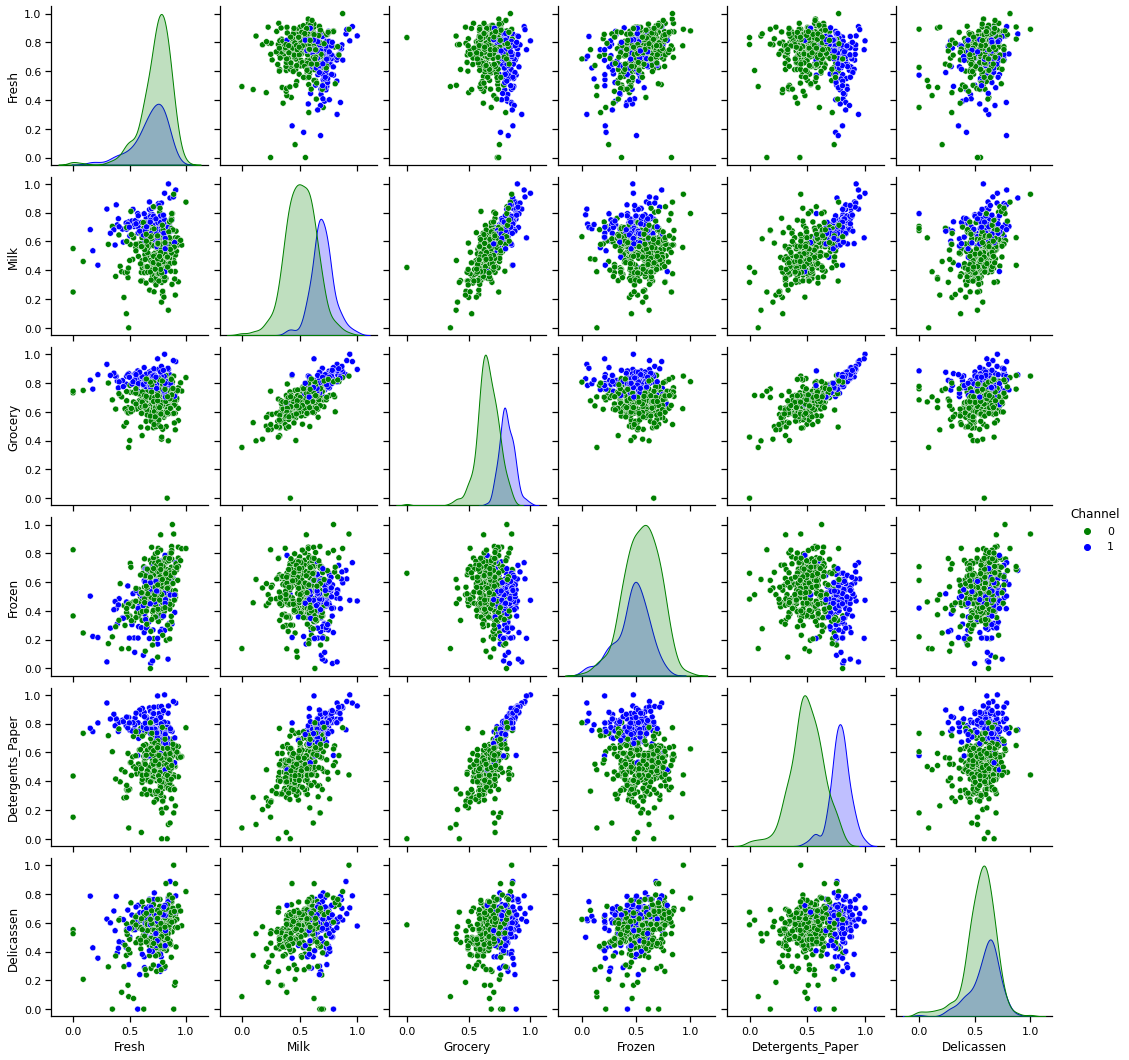

In [40]:
sns.set_context('notebook')
sns.pairplot(data[float_cols+['Channel']],hue='Channel',hue_order=[0,1],palette={0:'green',1:'blue'});

### Fitting different models

#### 1. K-Means Clustering

In [41]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2,random_state=42)
km = km.fit(data[float_cols])

data['kmeans'] = km.predict(data[float_cols])

Testing the model for different number of clusters from 1 to 20. We can see that the model performs the best at 4 clusters since the elbow is at 4.

In [42]:
km_list = []

for cluster in range(1,21):
    km = KMeans(n_clusters=cluster,random_state=42)
    km = km.fit(data[float_cols])

    km_list.append(pd.Series({'clusters':cluster, 'inertia':km.inertia_,'model':km}))

km_list = pd.concat(km_list,axis=1).T

Plotting the elbow curve

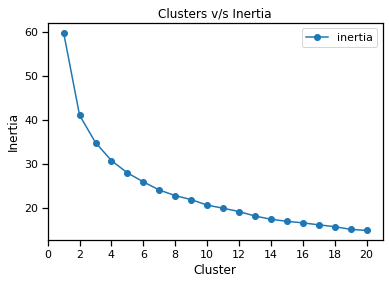

In [43]:
plot_data = km_list[['clusters','inertia']].set_index('clusters')

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster',ylabel='Inertia',title='Clusters v/s Inertia');

#### 2. Hierarchical Agglomerative Clustering (HAC)

In [44]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2,linkage='ward',compute_full_tree=True)
ag.fit(data[float_cols])

data['agglom'] = ag.fit_predict(data[float_cols])

We can see that K-Means and HAC have clustered the data a little differently since they are not exactly the same.

In [45]:
data[['Channel','kmeans','agglom']].groupby(['Channel','kmeans','agglom']).size().to_frame()

0
Channel kmeans agglom     
0       0      0        73
               1       181
        1      0        41
               1         3
1       0      0         4
               1         2
        1      0       136

Plotting a dendrogram to show how the HAC has worked

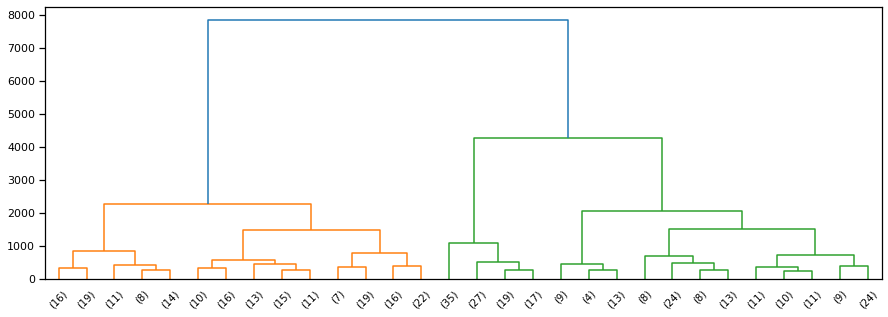

In [46]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z,orientation='top',p=30,truncate_mode='lastp',show_leaf_counts=True,ax=ax)

#### 3. Principal Component Analysis (PCA)

In [47]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

for n in range(1,6):

    pca = PCA(n_components=n,random_state=42)
    pca.fit(data[float_cols])

    pca_list.append(pd.Series({'Components':n,'Model':pca, 'Variance':pca.explained_variance_ratio_.sum()}))

    weights = pca.explained_variance_ratio_.reshape(-1,1)/pca.explained_variance_ratio_.sum()
    overall_contribution = np.abs(pca.components_)*weights
    abs_feature_vals = overall_contribution.sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'Components':n,'features':float_cols,'values':abs_feature_vals/abs_feature_vals.sum()}))

pca_df = pd.concat(pca_list,axis=1).T.set_index('Components')
pca_df

,Model,Variance
Components,,
1,"PCA(n_components=1, random_state=42)",0.448011
2,"PCA(n_components=2, random_state=42)",0.72099
3,"PCA(n_components=3, random_state=42)",0.827534
4,"PCA(n_components=4, random_state=42)",0.923045
5,"PCA(n_components=5, random_state=42)",0.979574


In [48]:
features_df = (pd.concat(feature_weight_list).pivot(index='Components',columns='features',values='values'))
features_df

features,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Components,,,,,,
1,0.071668,0.335487,0.060620,0.095979,0.190236,0.246010
2,0.131339,0.217022,0.133774,0.190615,0.131589,0.195662
3,0.139095,0.200361,0.156763,0.211791,0.119029,0.172961
4,0.164995,0.196973,0.173043,0.195434,0.110307,0.159248
5,0.164602,0.203512,0.164559,0.186438,0.107299,0.173591


Plotting Dimensions v/s Variance plot

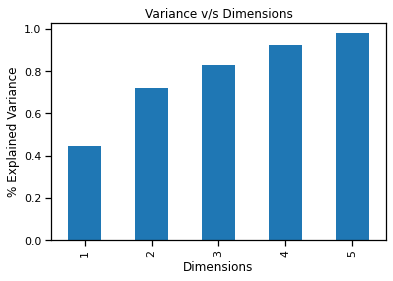

In [49]:
ax = pca_df['Variance'].plot(kind='bar')
ax.set(xlabel='Dimensions',ylabel='% Explained Variance',title='Variance v/s Dimensions');

Plotting the feature importances

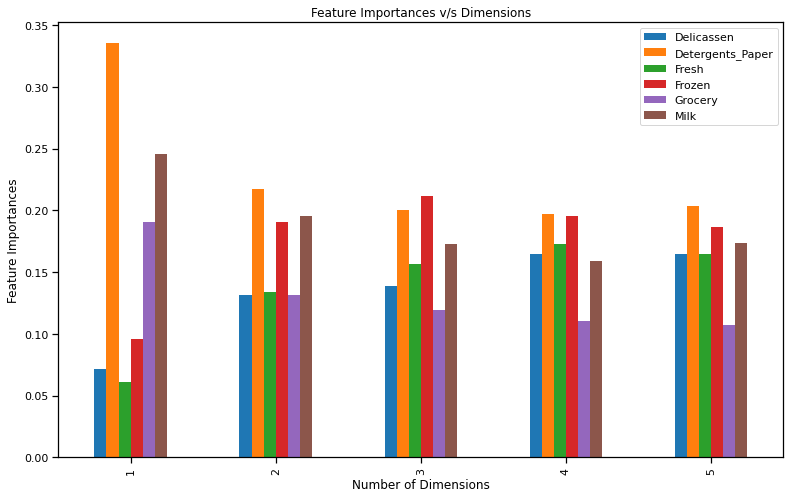

In [50]:
ax = features_df.plot(kind='bar',figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of Dimensions',ylabel='Feature Importances',title='Feature Importances v/s Dimensions');

Creating the best estimator using `GridSearchCV`

In [51]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# We will create a custom scorer to measure the error
def score(pca,X):
    try:
        X_val = X.values
    except:
        X_val = X

    inv = pca.fit_transform(X_val)
    inv = pca.inverse_transform(inv)

    rmse = np.sqrt(mean_squared_error(inv.ravel(),X.ravel()))

    return -1.0 * rmse

param_grid = {'gamma':[0.001,0.01,0.05,0.1,0.5,1.0], 'n_components':[2,3,4,5,6]}

kPCA = GridSearchCV(KernelPCA(kernel='rbf',fit_inverse_transform=True),param_grid=param_grid,scoring=score,n_jobs=-1)
kPCA = kPCA.fit(data[float_cols])

kPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=0.001, kernel='rbf', n_components=2)

#### Conclusion
**The best estimator that I got was `KernelPCA(fit_inverse_transform=True, gamma=0.001, kernel='rbf', n_components=2)`. This means that the model works the best for 2 clusters.**

### Potential Flaws and Next Plan of Action
The dataset in consideration had only 8 features to verify. A possible flaw may occur if the dataset has lots of columns (>100 columns). My next plan of action is to visit this project again and implement DBSCAN algorithm on the dataset. I also plan to implement the model on another dataset, possibly a larger one with 100+ columns to test whether the model works the same.